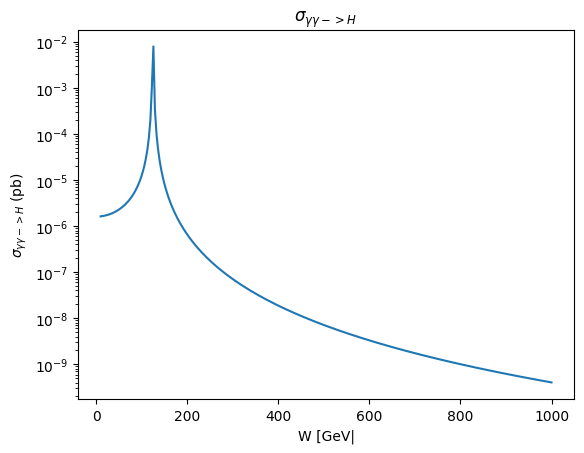

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Generate x values from 0 to 2*pi
wvalue = np.linspace(10, 1000, 300)


####################################################################

def cs_higgs_w_condition(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    MH = 125.0
    G = 4.2e-3
    Gyy = (2.27e-3)*(4.2e-3)
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Use np.greater for element-wise comparison
    condition = np.greater(wvalue, MH)
    cs = np.where(condition, (8. * np.pi * np.pi * hbarc2) * (Gyy / MH) * (1. / np.pi) *
                  ((MH * G) / ((MH * MH - wvalue * wvalue)*(MH * MH - wvalue * wvalue) + MH * MH * G * G)) * 1e9, 0.0)

    return cs

####################################################################

def cs_higgs_w(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    MH = 125.0
    G = 4.2e-3
    Gyy = (2.27e-3)*(4.2e-3)
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    cs = (8. * np.pi * np.pi* hbarc2 ) * (Gyy / MH)* (1.0/ np.pi) * \
         ( (MH *G)/((MH*MH - wvalue*wvalue)*(MH*MH-wvalue*wvalue) + MH*MH*G*G)) * 1e9

    return cs

####################################################################


# Calculate y values using sin function
#y = cs_higgs_w_condition(wvalue)
y = cs_higgs_w(wvalue)
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(wvalue, y)

ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV|')
ax.set_ylabel('$\sigma_{\gamma \gamma -> H}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma -> H}$')

# Save the plot as a PDF file
plt.savefig('cs_higgs_w_plot.pdf')
plt.savefig('cs_higgs_w_plot.jpg')

# Show the plot
plt.show()



Cross-Section at W = 125 GeV: 1.2325e-01 pb


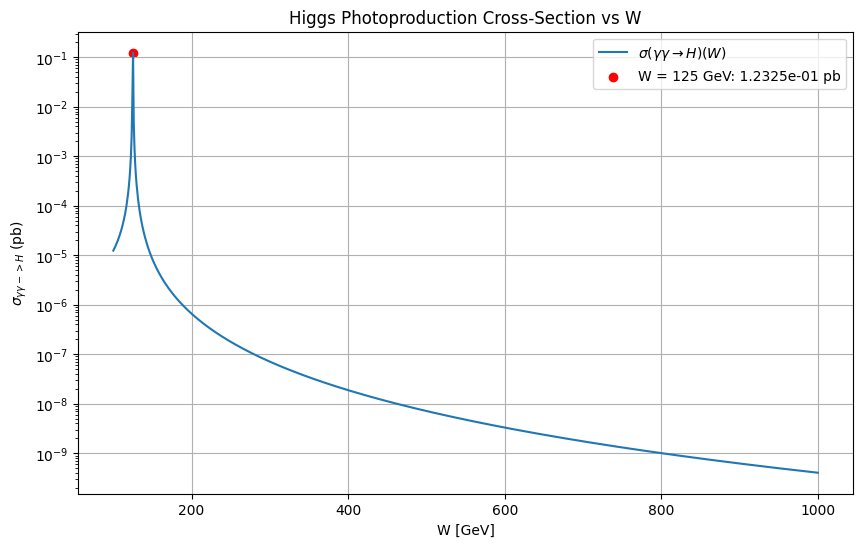

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate cross-section
def higgs_cross_section_final(wvalue):

    # Constants
    M_H = 125.0  # Higgs mass in GeV
    Gamma = 4.2e-3  # Total width
    Gamma_gamma = (2.27e-3)*(Gamma)  # Two-photon width
    hbarc2 =  0.389
    
    cs = 8 * np.pi**2 * hbarc2 * (Gamma_gamma / M_H) * (1 / np.pi) * (M_H * Gamma) / ((M_H**2 - wvalue**2)**2 + M_H**2 * Gamma**2)  * 1e9
    
    return cs



# Generate W values in the range from 100 to 1000 GeV
W_values = np.linspace(100, 1000, 1000)

# Calculate cross-section values
cross_section_values = higgs_cross_section_final(W_values)

# Find the index corresponding to W = 125 GeV
index_W_125 = np.argmin(np.abs(W_values - 125))

# Print the cross-section at W = 125 GeV
cs_at_W_125 = cross_section_values[index_W_125]
print(f'Cross-Section at W = 125 GeV: {cs_at_W_125:.4e} pb')

# Plotting with logarithmic y-axis
plt.figure(figsize=(10, 6))
plt.plot(W_values, cross_section_values, label=r'$\sigma (\gamma \gamma \to H)(W)$')
plt.scatter(125, cs_at_W_125, color='red', marker='o', label=f'W = 125 GeV: {cs_at_W_125:.4e} pb')

plt.yscale('log')  # Set y-axis to logarithmic scale

plt.title('Higgs Photoproduction Cross-Section vs W')
plt.xlabel('W [GeV]')
plt.ylabel('$\sigma_{\gamma \gamma -> H}$ (pb)')
plt.legend()
plt.grid(True)


# Save the plot as a PDF file
plt.savefig('cs_higgs_w_plot.pdf')
plt.savefig('cs_higgs_w_plot.jpg')

# Show the plot
plt.show()



plt.show()



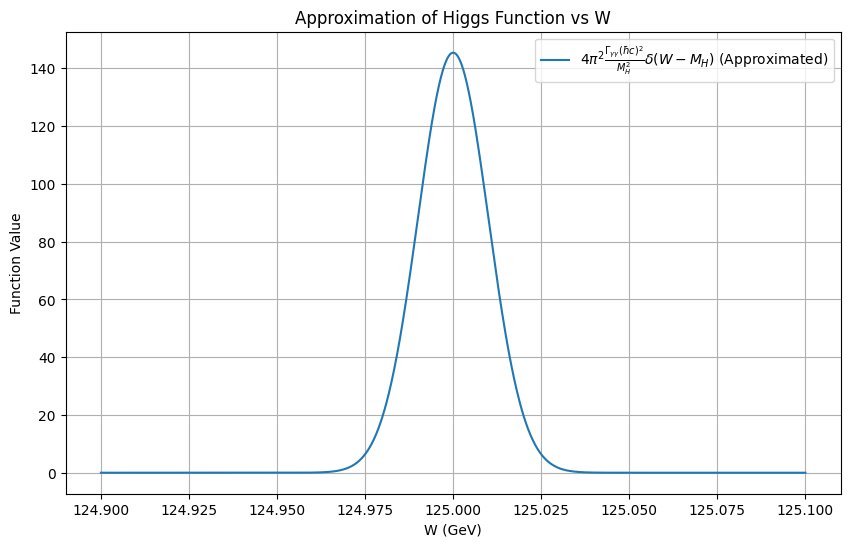

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M_H = 125.0  # Higgs mass in GeV
Gamma = 4.2e-3  # Total width
Gamma_gamma = (2.27e-3)*(Gamma)  # Two-photon width
hbarc2 =  0.389

# Function to approximate Dirac delta with Gaussian
def gaussian_approximation(W, mean, sigma):
    return np.exp(-(W - mean)**2.0 / (2.0 * sigma**2.0)) / (sigma * np.sqrt(2.0 * np.pi))

# Function to calculate the given expression
def higgs_function(W):
    return 4.0 * np.pi**2.0 * hbarc2 * (Gamma_gamma * hbarc2) / M_H**2.0 * gaussian_approximation(W, M_H, sigma=0.01)   * 1e9

# Generate W values in the neighborhood of M_H
W_values = np.linspace(M_H - 0.1, M_H + 0.1, 1000)

# Calculate function values
function_values = higgs_function(W_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(W_values, function_values, label=r'$4 \pi^2 \frac{\Gamma_{\gamma \gamma} (\hbar c)^2}{M_H^2}  \delta (W - M_H)$ (Approximated)')
plt.title('Approximation of Higgs Function vs W')
plt.xlabel('W (GeV)')
plt.ylabel('Function Value')

plt.legend()
plt.grid(True)
plt.show()



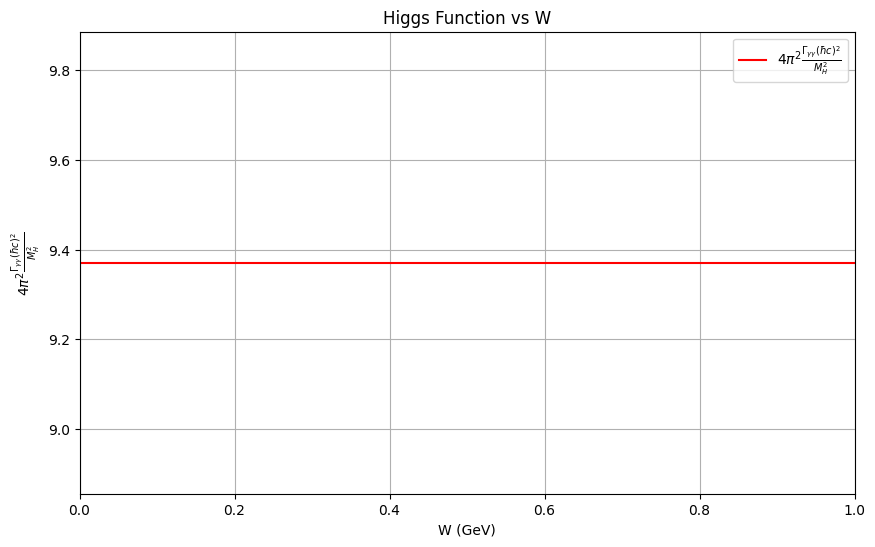

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M_H = 125  # Higgs mass in GeV
Gamma_gamma = (2.27e-3)*(4.2e-3)  # Two-photon width
hbarc2 = 0.389

# Function to calculate the given expression
def higgs_function(W):
    return 4.0 * np.pi**2.0 * (Gamma_gamma * hbarc2) / M_H**2 * 1e9

# Generate a single value for W
W_value = 125.0

# Calculate function value
function_value = higgs_function(W_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.axhline(y=function_value, color='r', linestyle='-', label=r'$4 \pi^2 \frac{\Gamma_{\gamma \gamma} (\hbar c)^2}{M_H^2}$')
plt.title('Higgs Function vs W')
plt.xlabel('W (GeV)')
plt.ylabel(r'$4 \pi^2 \frac{\Gamma_{\gamma \gamma} (\hbar c)^2}{M_H^2}$')
plt.legend()
plt.grid(True)
plt.show()



In [12]:
import numpy as np

# Constants
pi = np.pi
hbarc2 = 0.389
M_H = 125.0  # Higgs mass in GeV
Gamma_gamma = (2.27e-3) * (4.07e-3)  # Two-photon width

# Function to calculate the magnitude of the function at W = 125 GeV
def magnitude_at_125GeV():
    return ( 4.0 * pi**2.0 * Gamma_gamma * hbarc2 / M_H ** 2.0 )  * 1e9  * 1.60433547e-05

# Calculate and print the magnitude at 125 GeV
magnitude = magnitude_at_125GeV()
print(f"The magnitude of the function at W = 125 GeV is: {magnitude}")


The magnitude of the function at W = 125 GeV is: 0.0001456816205266302


In [9]:
import numpy as np

# Constants
pi = np.pi
hbarc2 = 0.389
M_H = 125.0  # Higgs mass in GeV
Gamma_gamma = (2.27e-3) * (4.07e-3)  # Two-photon width

# Function to calculate the magnitude of the function at W = 125 GeV
def magnitude_at_125GeV():
    return ( 4.0 * pi**2.0 * Gamma_gamma * hbarc2 / M_H ** 2.0 )  * 1e9  * 2.91916648e-05

# Calculate and print the magnitude at 125 GeV
magnitude = magnitude_at_125GeV()
print(f"The magnitude of the function at W = 125 GeV is: {magnitude}")

The magnitude of the function at W = 125 GeV is: 0.00026507479971967386


In [10]:
import numpy as np

# Constants
pi = np.pi
hbarc2 = 0.389
M_H = 125.0  # Higgs mass in GeV
Gamma_gamma = (2.27e-3) * (4.07e-3)  # Two-photon width

# Function to calculate the magnitude of the function at W = 125 GeV
def magnitude_at_125GeV():
    return ( 4.0 * pi**2.0 * Gamma_gamma * hbarc2 / M_H ** 2.0 )  * 1e9  * 9.22892881e-05

# Calculate and print the magnitude at 125 GeV
magnitude = magnitude_at_125GeV()
print(f"The magnitude of the function at W = 125 GeV is: {magnitude}")

The magnitude of the function at W = 125 GeV is: 0.0008380325249342674


In [11]:
import numpy as np

# Constants
pi = np.pi
hbarc2 = 0.389
M_H = 125.0  # Higgs mass in GeV
Gamma_gamma = (2.27e-3) * (4.07e-3)  # Two-photon width

# Function to calculate the magnitude of the function at W = 125 GeV
def magnitude_at_125GeV():
    return ( 4.0 * pi**2.0 * Gamma_gamma * hbarc2 / M_H ** 2.0 )  * 1e9  * 2.72467911e-04

# Calculate and print the magnitude at 125 GeV
magnitude = magnitude_at_125GeV()
print(f"The magnitude of the function at W = 125 GeV is: {magnitude}")

The magnitude of the function at W = 125 GeV is: 0.002474143815818374
